In [65]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from yellowbrick.model_selection import cv_scores,FeatureImportances

In [66]:
commerce=pd.concat(pd.read_excel('Project 02_Ecommerce_Dataset.xlsx', sheet_name=None), ignore_index=True)

In [67]:
commerce

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Returns,Sales Amount
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2.0,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,NaN,NaN
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3.0,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,NaN,NaN
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5.0,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,NaN,NaN
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2.0,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,NaN,NaN
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.0,1.0,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52080,El-2015-989,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Hull Sperren,NaN,NaN,NaN,NaN,NaN,Yes,199.0
52081,HF-2015-516,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Kelley Devincentis,NaN,NaN,NaN,NaN,NaN,Yes,78.0
52082,HF-2015-971,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tyler Kipp,NaN,NaN,NaN,NaN,NaN,Yes,216.0
52083,HF-2015-1673,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Landry Stobb,NaN,NaN,NaN,NaN,NaN,Yes,34.0


In [68]:
commerce.shape

(52085, 22)

In [69]:
commerce.isna().sum()

Order ID                0
Order Date            795
Shipping Date         795
Aging                 795
Ship Mode             795
Product Category      795
Product               795
Sales                 795
Quantity              795
Discount              795
Profit                795
Shipping Cost         795
Order Priority        795
Customer ID           795
Customer Name           0
Segment               795
City                  795
State                 795
Country               795
Region                795
Returns             51290
Sales Amount        51290
dtype: int64

In [102]:
sales=pd.read_excel('Project 02_Ecommerce_Dataset.xlsx')
sales

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.000000,4.600000,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.010000,11.201000,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.150000,3.115000,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.200000,2.620000,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.000000,16.000000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,0.04,17.000000,1.700000,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central
51286,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,0.03,2.450000,0.245000,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa
51287,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,0.05,0.750000,0.075000,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania
51288,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,0.04,28.333333,2.833333,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central


In [103]:
sales.dtypes

Order ID                    object
Order Date          datetime64[ns]
Shipping Date       datetime64[ns]
Aging                        int64
Ship Mode                   object
Product Category            object
Product                     object
Sales                        int64
Quantity                     int64
Discount                   float64
Profit                     float64
Shipping Cost              float64
Order Priority              object
Customer ID                 object
Customer Name               object
Segment                     object
City                        object
State                       object
Country                     object
Region                      object
dtype: object

In [104]:
sales.isna().sum()

Order ID            0
Order Date          0
Shipping Date       0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
dtype: int64

In [105]:
sales.nunique()

Order ID            51290
Order Date            365
Shipping Date         375
Aging                  10
Ship Mode               4
Product Category        4
Product                42
Sales                  39
Quantity                5
Discount                5
Profit                464
Shipping Cost         461
Order Priority          4
Customer ID         51290
Customer Name         795
Segment                 3
City                 3636
State                1094
Country               147
Region                 13
dtype: int64

In [106]:
sales.columns

Index(['Order ID', 'Order Date', 'Shipping Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region'],
      dtype='object')

In [107]:
sales=sales.drop(['Order ID','Customer ID','Customer Name','City','State','Country'],axis=1)

In [108]:
sales['duration']=sales['Shipping Date']-sales['Order Date']
sales['duration']=sales['duration'].dt.days
sales

,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,Region,duration
0,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.000000,4.600000,Medium,Consumer,Oceania,8
1,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.010000,11.201000,Medium,Home Office,Central,2
2,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.150000,3.115000,Critical,Consumer,Oceania,8
3,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.200000,2.620000,High,Corporate,Central Asia,7
4,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.000000,16.000000,Critical,Corporate,Oceania,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,0.04,17.000000,1.700000,Medium,Corporate,Central,6
51286,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,0.03,2.450000,0.245000,Medium,Corporate,Africa,2
51287,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,0.05,0.750000,0.075000,Medium,Home Office,Oceania,6
51288,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,0.04,28.333333,2.833333,Medium,Consumer,Central,7


In [109]:
sales=sales.drop(['Order Date','Shipping Date'],axis=1)

In [110]:
sales.head()

,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Segment,Region,duration
0,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,Consumer,Oceania,8
1,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,Home Office,Central,2
2,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,Consumer,Oceania,8
3,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,Corporate,Central Asia,7
4,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,Corporate,Oceania,9


In [111]:
obj=sales.select_dtypes(include='O')
obj.columns

Index(['Ship Mode', 'Product Category', 'Product', 'Order Priority', 'Segment',
       'Region'],
      dtype='object')

In [112]:
obj.nunique()

Ship Mode            4
Product Category     4
Product             42
Order Priority       4
Segment              3
Region              13
dtype: int64

In [113]:
objc=['Product','Region']

# One Hot Encoding

In [117]:
sales=pd.get_dummies(sales,columns=['Ship Mode','Product Category','Order Priority','Segment'])
sales.dtypes


Aging                                    int64
Product                                  int32
Sales                                    int64
Quantity                                 int64
Discount                               float64
Profit                                 float64
Shipping Cost                          float64
Region                                   int32
duration                                 int64
Ship Mode_First Class                    uint8
Ship Mode_Same Day                       uint8
Ship Mode_Second Class                   uint8
Ship Mode_Standard Class                 uint8
Product Category_Auto & Accessories      uint8
Product Category_Electronic              uint8
Product Category_Fashion                 uint8
Product Category_Home & Furniture        uint8
Order Priority_Critical                  uint8
Order Priority_High                      uint8
Order Priority_Low                       uint8
Order Priority_Medium                    uint8
Segment_Consu

# Label Encoding

In [118]:
for ob in objc:
    sales[ob]=le.fit_transform(sales[ob])
sales.dtypes

Aging                                    int64
Product                                  int64
Sales                                    int64
Quantity                                 int64
Discount                               float64
Profit                                 float64
Shipping Cost                          float64
Region                                   int64
duration                                 int64
Ship Mode_First Class                    uint8
Ship Mode_Same Day                       uint8
Ship Mode_Second Class                   uint8
Ship Mode_Standard Class                 uint8
Product Category_Auto & Accessories      uint8
Product Category_Electronic              uint8
Product Category_Fashion                 uint8
Product Category_Home & Furniture        uint8
Order Priority_Critical                  uint8
Order Priority_High                      uint8
Order Priority_Low                       uint8
Order Priority_Medium                    uint8
Segment_Consu

In [119]:
sales.dtypes

Aging                                    int64
Product                                  int64
Sales                                    int64
Quantity                                 int64
Discount                               float64
Profit                                 float64
Shipping Cost                          float64
Region                                   int64
duration                                 int64
Ship Mode_First Class                    uint8
Ship Mode_Same Day                       uint8
Ship Mode_Second Class                   uint8
Ship Mode_Standard Class                 uint8
Product Category_Auto & Accessories      uint8
Product Category_Electronic              uint8
Product Category_Fashion                 uint8
Product Category_Home & Furniture        uint8
Order Priority_Critical                  uint8
Order Priority_High                      uint8
Order Priority_Low                       uint8
Order Priority_Medium                    uint8
Segment_Consu

In [120]:
#separating independent and dependent variables
x=sales.drop('Sales',axis=1)#independent variables
y=sales.Sales#dependent variables

In [124]:
#split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Decision Tree Regressor

In [125]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
dt_pred=dt.predict(x_test)

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [130]:
print('MAE',mean_absolute_error(y_test,dt_pred))
print('MSE',mean_squared_error(y_test,dt_pred))
print('R_SQUARED',r2_score(y_test,dt_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,dt_pred))))

MAE 0.0
MSE 0.0
R_SQUARED 1.0
Rmse 0.0


# Extra Trees Regressor

In [131]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)

ExtraTreesRegressor()

In [132]:
et_pred=et.predict(x_test)

In [134]:
print('MAE',mean_absolute_error(y_test,et_pred))
print('MSE',mean_squared_error(y_test,et_pred))
print('R_SQUARED',r2_score(y_test,et_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,et_pred))))

MAE 0.0004883992981087964
MSE 0.0003863228699551631
R_SQUARED 0.9999999108063015
Rmse 0.019655097810877542


# K Nearest Neighbor

In [135]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [136]:
kn_pred=kn.predict(x_test)

In [137]:
print('MAE',mean_absolute_error(y_test,kn_pred))
print('MSE',mean_squared_error(y_test,kn_pred))
print('R_SQUARED',r2_score(y_test,kn_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,kn_pred))))

MAE 1.0438292064729966
MSE 25.951070384090468
R_SQUARED 0.9940084521781303
Rmse 5.094219310560792


# Ada Boost Regressor

In [139]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)

AdaBoostRegressor()

In [141]:
ab_pred=ab.predict(x_test)

In [142]:
print('MAE',mean_absolute_error(y_test,ab_pred))
print('MSE',mean_squared_error(y_test,ab_pred))
print('R_SQUARED',r2_score(y_test,ab_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,ab_pred))))

MAE 15.073697623428554
MSE 343.81203897589006
R_SQUARED 0.9206211442237286
Rmse 18.54216920901894


# Random Forest Regressor

In [143]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
rf_pred=rf.predict(x_test)

In [145]:
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))
print('R_SQUARED',r2_score(y_test,rf_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,rf_pred))))

MAE 0.0013199454084616904
MSE 0.002206239032949903
R_SQUARED 0.9999994906265338
Rmse 0.04697061882655904


# Gradient Boosting Regressor

In [147]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [148]:
gb_pred=gb.predict(x_test)

In [149]:
print('MAE',mean_absolute_error(y_test,gb_pred))
print('MSE',mean_squared_error(y_test,gb_pred))
print('R_SQUARED',r2_score(y_test,gb_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,gb_pred))))

MAE 5.044732365882921
MSE 58.45393147913482
R_SQUARED 0.9865042358311261
Rmse 7.645517083829898


# Linear Regression

In [150]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [151]:
lr_pred=lr.predict(x_test)

In [152]:
print('MAE',mean_absolute_error(y_test,lr_pred))
print('MSE',mean_squared_error(y_test,lr_pred))
print('R_SQUARED',r2_score(y_test,lr_pred))
print('Rmse',(sqrt(mean_squared_error(y_test,lr_pred))))

MAE 16.17417503411971
MSE 464.6021139959095
R_SQUARED 0.8927332960472094
Rmse 21.554630917645273


# The best performing model is the Decision Tree Regressor

# Feature Importance

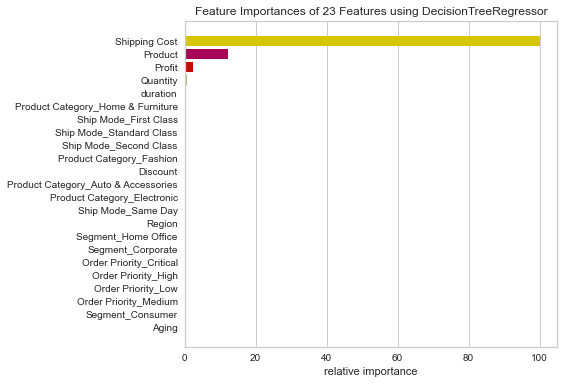

<AxesSubplot:title={'center':'Feature Importances of 23 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [153]:
dt=DecisionTreeRegressor()
imp=FeatureImportances(dt)
imp.fit(x_train,y_train)
imp.show()